In [1]:
import numpy as np
import matplotlib.pyplot as plt 
%matplotlib inline

In [9]:
start_plot_idx = 0

def show_loss(lossfile,iter_interval,statistic_interval,lineset):
   loss_file = open(lossfile, 'r')
   loss_total = loss_file.readlines()
   loss_num = len(loss_total)
   loss_res = np.zeros(loss_num)
   loss_idx = np.arange(loss_num) * iter_interval

   for idx in range(loss_num) :
       loss_str = loss_total[idx]
       str_start_idx = loss_str.find('= ')+1
       str_end_idx = len(loss_str) - 1
       tmp = loss_str[str_start_idx+1:str_end_idx]
       #print "tmp=",tmp
       loss_res[idx] = float(tmp.split(' ')[0])
       
   statistic_len = int((loss_num + statistic_interval - 1)/statistic_interval)
   statistic_idx = np.arange(statistic_len) * iter_interval * statistic_interval
   statistic_res_mean = np.zeros(statistic_len)
   statistic_res_var = np.zeros(statistic_len)
   
   for idx in range(statistic_len) :
       loss_start_idx = idx*statistic_interval
       loss_end_idx = min(loss_start_idx + statistic_interval, loss_num)
       loss_part = loss_res[loss_start_idx : loss_end_idx]
       statistic_res_mean[idx] = np.mean(loss_part)
       statistic_res_var[idx] = np.var(loss_part)
       
   plt.plot(statistic_idx[start_plot_idx:], statistic_res_mean[start_plot_idx:],lineset,label=lossfile)

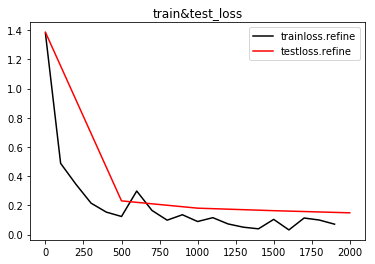

In [11]:
show_loss('trainloss.refine',100,1,'k-')
show_loss('testloss.refine',500,1,'r-')
plt.title('train&test_loss')
plt.savefig('loss.png')
plt.legend()
plt.show()